### K-Means Clustering Algorithm

The K means clustering algorithm divides a set of n observations into k clusters. Use K means clustering when you don’t have existing group labels and want to assign similar data points to the number of groups you specify (K)

“K means” refers to the following:

The number of clusters you specify (K).
The process of assigning observations to the cluster with the nearest center (mean).

Then the algorithm continues as follows:

1. It evaluates each observation, assigning it to the closest cluster. The definition of “closest” is that the Euclidean distance between a data point and a group’s centroid is shorter than the distances to the other centroids.
2. When a cluster gains or loses a data point, the K means clustering algorithm recalculates its centroid.
3. The algorithm repeats until it can no longer assign data points to a closer set.

When the K means clustering algorithm finishes, all groups have the minimum within-cluster variance, which keeps them as small as possible. Sets with minimum variance and size have data points that are as similar as possible.

In [6]:
import io

import pandas as pd
from google.colab import files

In [4]:
uploaded = files.upload()

Saving housing.csv to housing.csv


In [12]:
home_data = pd.read_csv(io.BytesIO(uploaded['housing.csv']), usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


<Axes: xlabel='longitude', ylabel='latitude'>

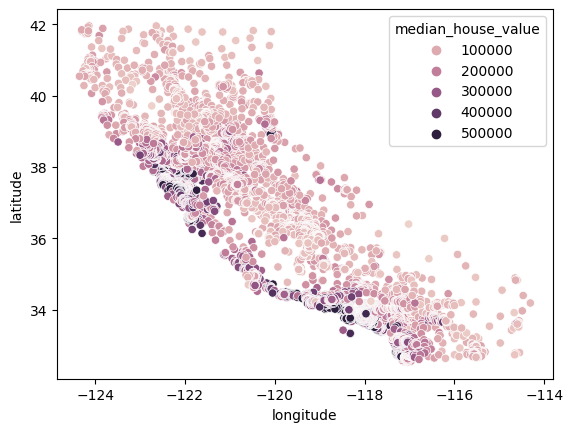

In [13]:
import seaborn as sns

sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')

#### Normalizing the Data



In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

In [15]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

#### Fitting and Evaluating the Model


In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, n_init='auto', random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

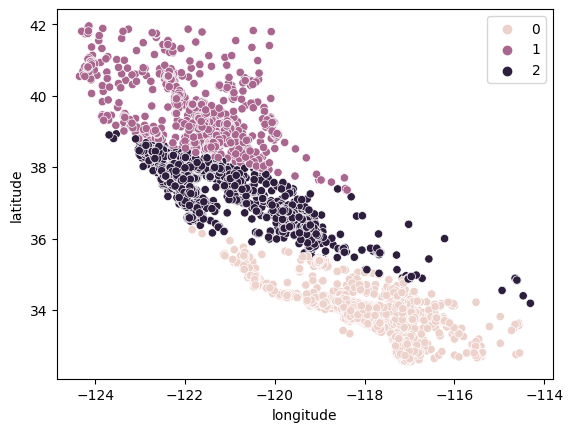

In [18]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

<Axes: ylabel='median_house_value'>

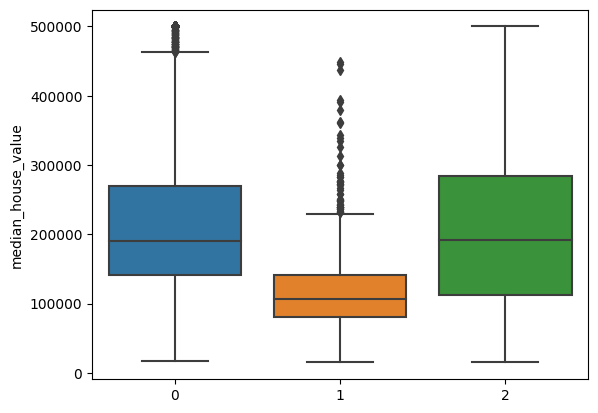

In [19]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])

In [20]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.7499371920703546

#### Choosing the best number of clusters

In [21]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)

    # append the model to fits
    fits.append(model)

    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

<Axes: xlabel='longitude', ylabel='latitude'>

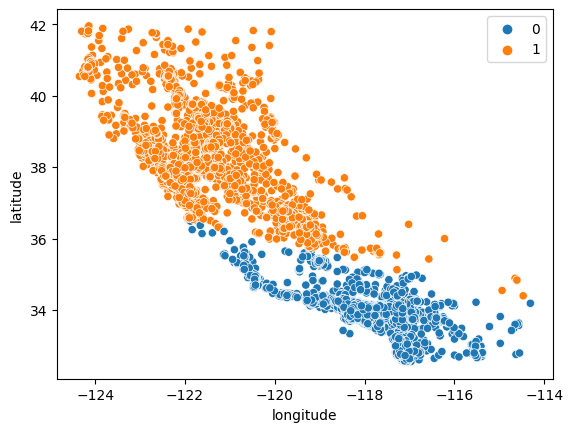

In [22]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[0].labels_)

<Axes: xlabel='longitude', ylabel='latitude'>

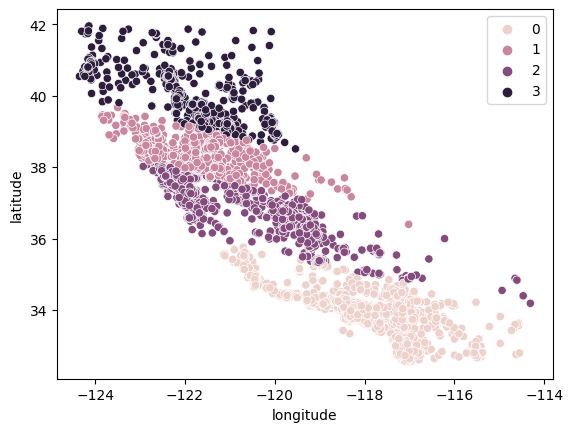

In [23]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_)

<Axes: xlabel='longitude', ylabel='latitude'>

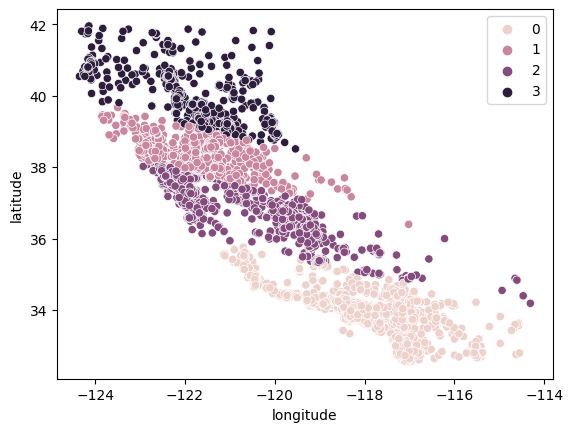

In [24]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_)

<Axes: xlabel='longitude', ylabel='latitude'>

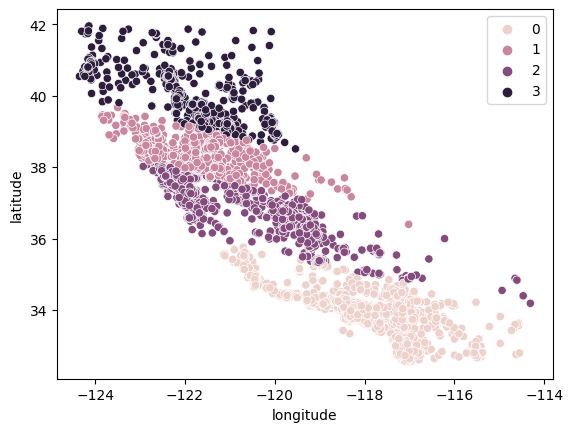

In [25]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_)

<Axes: >

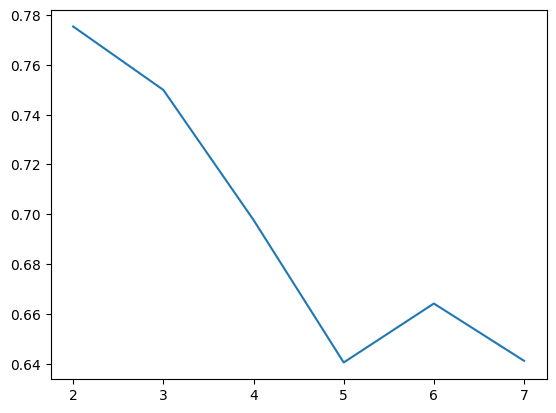

In [26]:
sns.lineplot(x = K, y = score)

<Axes: xlabel='longitude', ylabel='latitude'>

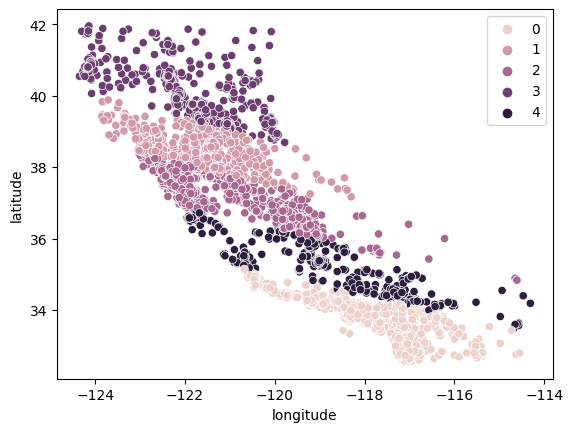

In [27]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[3].labels_)

<Axes: ylabel='median_house_value'>

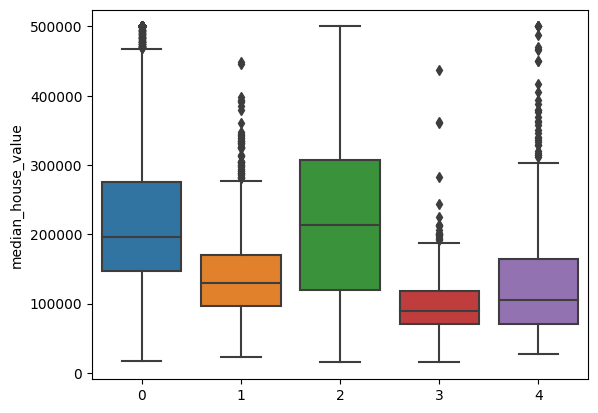

In [28]:
sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value'])